In [1]:
pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import ticker
from scipy.spatial import KDTree
import h5py

%matplotlib widget


In [4]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula_map.set_under(cm_data[0])

In [5]:
filename = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/QL_bounce_TCV72644_fluct.h5'
filename2 = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/QL_bounce_TCV72644_nofluct.h5'

In [6]:
file = h5py.File(filename, 'r')
file2 = h5py.File(filename2, 'r')

# Read the data

QL_bounce_fluct = file['DRF0_wh'][()]
QL_bounce_nofluct = file2['DRF0_wh'][()]
psi = file['psi'][()]
theta = file['theta'][()]  
ksi = file['ksi'][()][:-1]
p_norm = file['p_norm'][()]



In [7]:
ksi_half = ksi + np.diff(ksi)[0]/2

In [8]:
Pnorm, Ksi = np.meshgrid(p_norm, ksi_half)

Ppar, Pper = Pnorm*Ksi, Pnorm*np.sqrt(1-Ksi**2)

PPAR = np.tile(Ppar, (len(psi), 1, 1))
PPER = np.tile(Pper, (len(psi), 1, 1))

RHO = np.tile(np.sqrt(psi.T), (len(p_norm), len(ksi), 1)).T

QL_bounce_fluct = np.transpose(QL_bounce_fluct, (0, 2, 1))
QL_bounce_nofluct = np.transpose(QL_bounce_nofluct, (0, 2, 1))

In [9]:
print(QL_bounce_fluct.shape)
print(PPER.shape)
print(PPAR.shape)
print(RHO.shape)


(40, 299, 100)
(40, 299, 100)
(40, 299, 100)
(40, 299, 100)


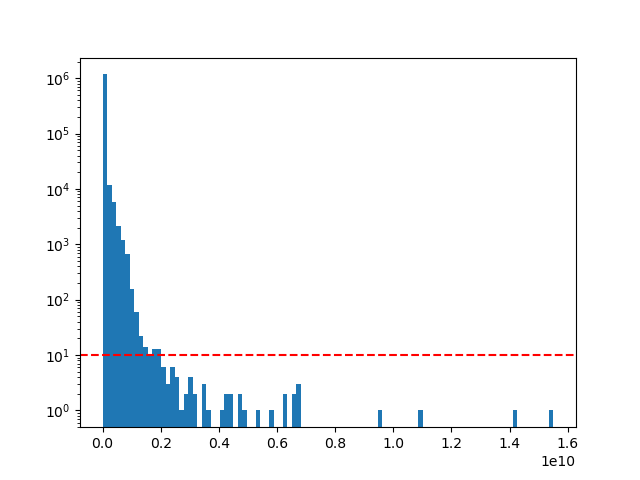

In [10]:
Ql_all = QL_bounce_fluct.flatten()
freqbins = plt.hist(Ql_all, bins=100, density=False, log=True)
plt.axhline(1e1, color='r', linestyle='--')
plt.show()


In [11]:
max_QL = np.nanmax(QL_bounce_fluct)
QL_bounce_fluct = np.where(np.isnan(QL_bounce_fluct), 0, QL_bounce_fluct)
QL_bounce_fluct = np.where(QL_bounce_fluct > 1.9e9, 1.9e9, QL_bounce_fluct)
QL_bounce_fluct /= 1.9e9
print(max_QL)

max_QL = np.nanmax(QL_bounce_nofluct)
QL_bounce_nofluct = np.where(np.isnan(QL_bounce_nofluct), 0, QL_bounce_nofluct)
QL_bounce_nofluct = np.where(QL_bounce_nofluct > 1.9e9, 1.9e9, QL_bounce_nofluct)
QL_bounce_nofluct /= 1.9e9
print(max_QL)



15507327850.612421
23411460444.96086


In [12]:
# Filter out the low values

Lowerbound = 1e-5

QL_present_fluct = QL_bounce_fluct[QL_bounce_fluct>Lowerbound]
QL_present_nofluct = QL_bounce_nofluct[QL_bounce_nofluct>Lowerbound]


print(QL_present_fluct.shape[0]/QL_bounce_fluct.size)
print(QL_present_nofluct.shape[0]/QL_bounce_nofluct.size)

RHO_present_fluct = RHO[QL_bounce_fluct>Lowerbound]
PPAR_present_fluct = PPAR[QL_bounce_fluct>Lowerbound]
PPER_present_fluct = PPER[QL_bounce_fluct>Lowerbound]

RHO_present_nofluct = RHO[QL_bounce_nofluct>Lowerbound]
PPAR_present_nofluct = PPAR[QL_bounce_nofluct>Lowerbound]
PPER_present_nofluct = PPER[QL_bounce_nofluct>Lowerbound]



0.2350484949832776
0.14145903010033445


In [13]:
QL_bounce_diff = abs(QL_bounce_fluct - QL_bounce_nofluct)

/tmp/ipykernel_24937/3344593209.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig = ax.pcolormesh(PPAR[i], PPER[i], QL_bounce_nofluct[i], cmap=parula_map, norm=LogNorm(1e-4, 1e0))
/tmp/ipykernel_24937/3344593209.py:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig2 = ax2.pcolormesh(PPAR[i], PPER[i], QL_bounce_fluct[i], cmap=parula_map, norm=LogNorm(1e-4, 1e0))


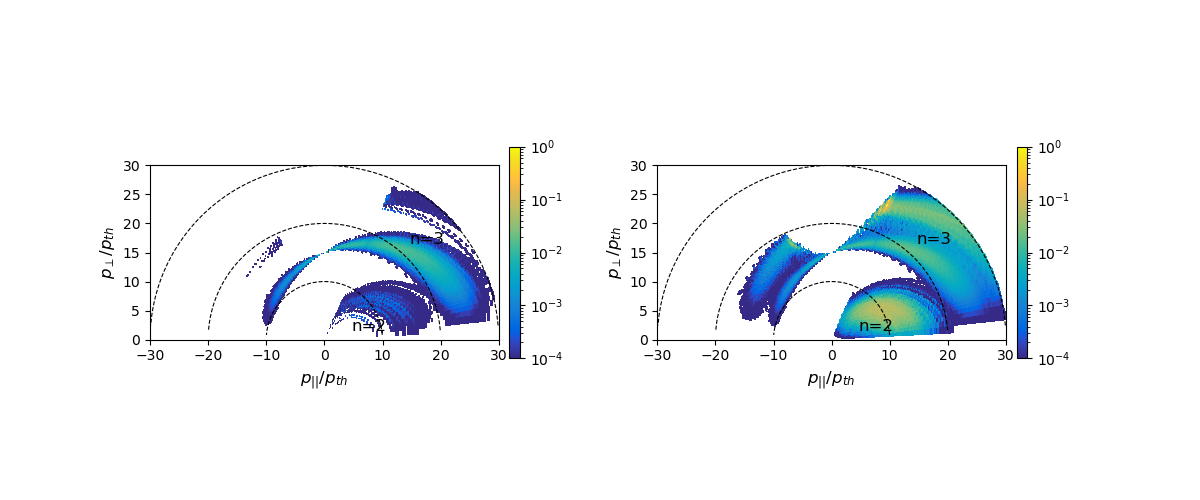

In [14]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)
QL_bounce_fluct = np.where(QL_bounce_fluct<Lowerbound, 0, QL_bounce_fluct)
QL_bounce_nofluct = np.where(QL_bounce_nofluct<Lowerbound, 0, QL_bounce_nofluct)
i = 17
fig = ax.pcolormesh(PPAR[i], PPER[i], QL_bounce_nofluct[i], cmap=parula_map, norm=LogNorm(1e-4, 1e0))
#fig = plt.contourf(PPAR[i], PPER[i], QL_bounce[i], cmap=parula_map, norm=LogNorm(),levels=np.logspace(-3, 0, 100))
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)
#colorbar.set_label(label=r'$D^{EC,0}_{n=2,3}$ [A.U.]', size=10)
plt.contour(PPAR[i], PPER[i], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, 30)
ax.set_xlim(-30, 30)
ax.set_aspect('equal')
#vmin=Lowerbound, vmax=1  norm=LogNorm()

ax2 = plt.subplot(122)
fig2 = ax2.pcolormesh(PPAR[i], PPER[i], QL_bounce_fluct[i], cmap=parula_map, norm=LogNorm(1e-4, 1e0))
colorbar2 = plt.colorbar(fig2, orientation='vertical', pad=.025, shrink=.55)
plt.contour(PPAR[i], PPER[i], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

ax2.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax2.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax2.set_ylim(0, 30)
ax2.set_xlim(-30, 30)
ax2.set_aspect('equal')

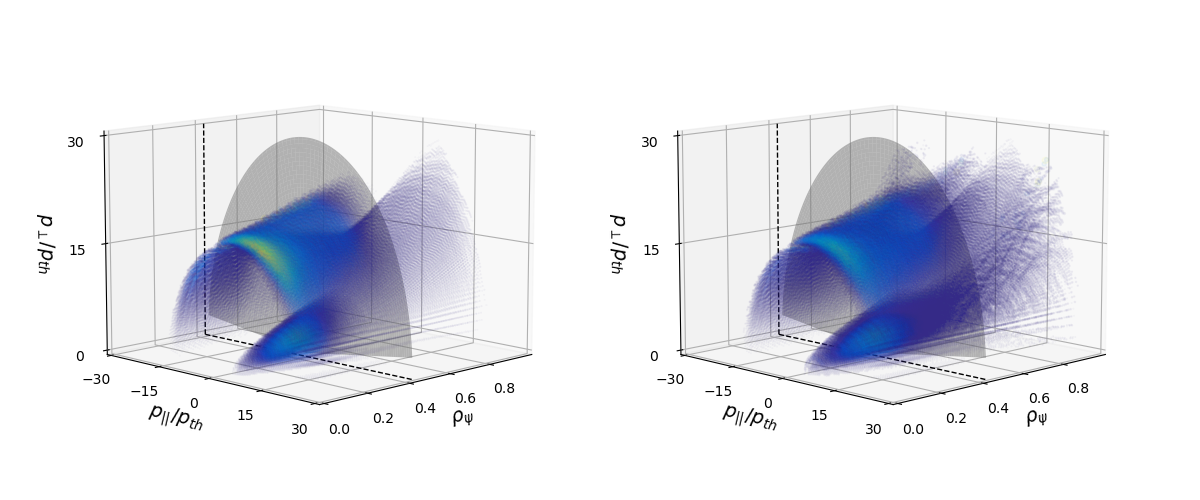

0.43595384615384614


In [15]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121, projection='3d')

#ax.scatter(RHO, PPAR, PPER, c=QL_bounce, s=100*QL_bounce**2, alpha=0.5)
ax.scatter(RHO_present_nofluct[::2], PPAR_present_nofluct[::2], PPER_present_nofluct[::2], c=QL_present_nofluct[::2], cmap=parula_map, s=20*np.sqrt(QL_present_nofluct[::2]), alpha=.05)

# Plot a vertical surface

rho = RHO[i, 0, 0]
ax.plot_surface(np.tile(rho, (len(p_norm), len(ksi_half))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax.plot([rho, rho], [-31, 30], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax.plot([rho, rho], [-31, -31], [-.5, 30], color='black', linestyle='dashed', linewidth=1)

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([1, 0])
ax.set_xticks([0.8, 0.6, 0.4, 0.2, 0])
ax.set_ylim([-30, 30])
ax.set_yticks([-30, -15, 0, 15, 30])
ax.set_zlim([0, 30])
ax.set_zticks([0, 15, 30])

ax.view_init(elev=10, azim=45)

ax2 = fig.add_subplot(122, projection='3d')

#ax.scatter(RHO, PPAR, PPER, c=QL_bounce, s=100*QL_bounce**2, alpha=0.5)
ax2.scatter(RHO_present_fluct[::2], PPAR_present_fluct[::2], PPER_present_fluct[::2], c=QL_present_fluct[::2], cmap=parula_map, s=20*np.sqrt(QL_present_fluct[::2]), alpha=.05)

# Plot a vertical surface

rho = RHO[i, 0, 0]
ax2.plot_surface(np.tile(rho, (len(p_norm), len(ksi_half))).T, PPAR[i], PPER[i], alpha=0.5, color='grey')
ax2.plot([rho, rho], [-31, 30], [-.5, -0.5], color='black', linestyle='dashed', linewidth=1)
ax2.plot([rho, rho], [-31, -31], [-.5, 30], color='black', linestyle='dashed', linewidth=1)

ax2.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax2.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax2.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax2.set_xlim([1, 0])
ax2.set_xticks([0.8, 0.6, 0.4, 0.2, 0])
ax2.set_ylim([-30, 30])
ax2.set_yticks([-30, -15, 0, 15, 30])
ax2.set_zlim([0, 30])
ax2.set_zticks([0, 15, 30])

ax2.view_init(elev=10, azim=45)



plt.tight_layout()

plt.show()

print(rho)

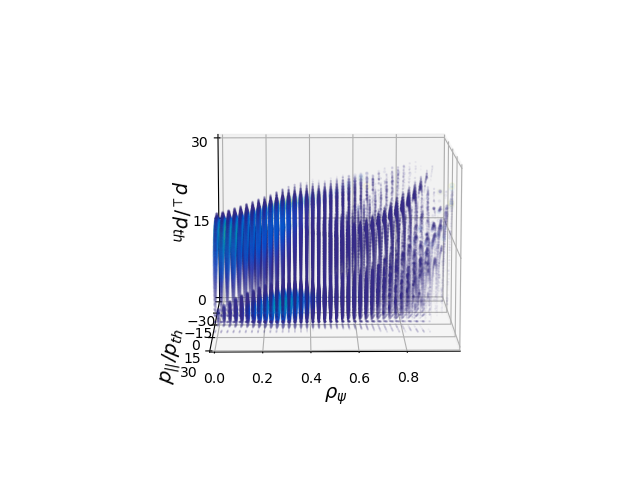

In [19]:
from matplotlib import animation

plt.rcParams['animation.ffmpeg_path'] = '/home/devlamin/.local/lib/python3.10/site-packages/ffmpeg'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(r'$\rho_{\psi}$', fontsize= 14)
ax.set_ylabel(r'$p_{\||}/p_{th}$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/p_{th}$', fontsize= 14, rotation=180)

ax.set_xlim([1, 0])
ax.set_xticks([0.8, 0.6, 0.4, 0.2, 0])
ax.set_ylim([-30, 30])
ax.set_yticks([-30, -15, 0, 15, 30])
ax.set_zlim([0, 30])
ax.set_zticks([0, 15, 30])

path_ele = np.sqrt(np.linspace(0, 100, 100))
path_azi = np.linspace(0, 90, 100)

ax.scatter(RHO_present_fluct[::2], PPAR_present_fluct[::2], PPER_present_fluct[::2], c=QL_present_fluct[::2], cmap=parula_map, s=20*np.sqrt(QL_present_fluct[::2]), alpha=.05)



for i in range(0,99,1):
    ax.view_init(elev=path_ele[i], azim=path_azi[i])
    plt.savefig("/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV72644/t_1.05/output/movie/movie_{:03d}.png".format(i))